In [1]:
%pylab inline
%matplotlib inline
import numpy as np
from numpy.random import shuffle
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

Populating the interactive namespace from numpy and matplotlib


In [2]:
import wget

# load data from file
CBD=loadtxt('banking.txt')
CBD = CBD # to keep data consistent 
shuffle(CBD)

In [3]:
class_labels_CBD =CBD[:,-1]
class_labels_CBD= [ int(x) for x in class_labels_CBD ]
class_labels_CBD = np.asarray(class_labels_CBD)

In [4]:
data_CBD=CBD[:,0:-1]

In [5]:
mlp_CBD = MLPClassifier(activation = 'logistic', solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100), max_iter = 2000)
scores_CBD = cross_val_score(mlp_CBD,data_CBD,class_labels_CBD, cv=10, scoring = "accuracy")
print(scores_CBD)
print("mean:" )
print(scores_CBD.mean())

[ 0.78947368  0.75438596  0.85964912  0.75438596  0.80701754  0.73214286
  0.73214286  0.83928571  0.73214286  0.71428571]
mean:
0.77149122807


In [6]:
def cross_validation(K):
    n_range_CBD = range(1,51)
    n_scores_CBD = list()
    for n in n_range_CBD:

        mlp_CBD = MLPClassifier(activation = 'logistic', solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(n))
        scores_CBD = cross_val_score(mlp_CBD,data_CBD,class_labels_CBD, cv=K, scoring = "accuracy")

        n_scores_CBD.append(scores_CBD.mean())

#     print(n_scores_CBD)
    print("mean: ")
    print(sum(n_scores_CBD)/len(n_scores_CBD))
    return n_scores_CBD

In [7]:

def find_opt_nodes(n_scores):
    max_num = max(n_scores)
    for i in range(len(n_scores)):
        if n_scores[i] == max_num:
            print("number nodes: ", i+1)
            print("accuracy: ", max_num*100, "%")
            print("accuracy: ", round(max_num*100,2),"%")
            return i+1
        
test1 = cross_validation(10)
test2 = cross_validation(10)
test3 = cross_validation(10)
n_CBD1 = find_opt_nodes(test1)
n_CBD2 = find_opt_nodes(test2)
n_CBD3 = find_opt_nodes(test3)

mean: 
0.756837092732
mean: 
0.757512531328
mean: 
0.758595864662
number nodes:  36
accuracy:  78.7562656642 %
accuracy:  78.76 %
number nodes:  35
accuracy:  78.2205513784 %
accuracy:  78.22 %
number nodes:  22
accuracy:  79.0977443609 %
accuracy:  79.1 %


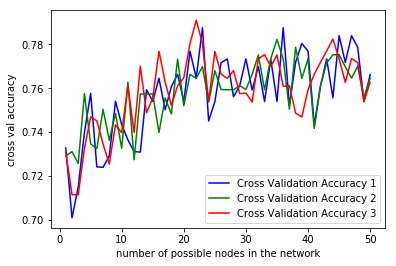

In [8]:
import matplotlib.pyplot as plt

figure()
figsize(8,8)
plt.plot(range(1,51),test1,"b", label ="Cross Validation Accuracy 1")
plt.plot(range(1,51),test2,"g", label ="Cross Validation Accuracy 2")
plt.plot(range(1,51),test3,"r", label ="Cross Validation Accuracy 3")
plt.xlabel("number of possible nodes in the network")
plt.ylabel("cross val accuracy")
legend(loc = "best")